<a href="https://colab.research.google.com/github/Kienknu/Kienknu/blob/main/K_Structures_Generation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 17.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdChemReactions
from IPython.display import display

In [ ]:
def load_data(file_path):
    df = pd.read_csv(file_path)
    df.fillna("None", inplace=True)
    return df.head(12)

In [ ]:
def generate_reaction_images(df):
    reaction_images = []
    for _, row in df.iterrows():
        reactants = row['reactant']
        reagents = row['reagent'] if 'reagent' in row else ""
        products = row['product']

        # Construct reaction SMILES
        reaction_smiles = f"{reactants}.{reagents}>>{products}" if reagents else f"{reactants}>>{products}"
        reaction = rdChemReactions.ReactionFromSmarts(reaction_smiles)

        if reaction:
            img = Draw.ReactionToImage(reaction, subImgSize=(100, 100))
            reaction_images.append(img)


    return reaction_images

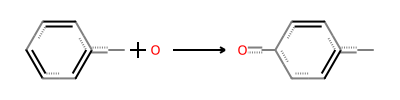

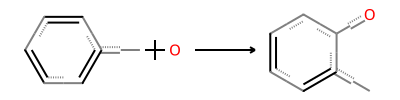

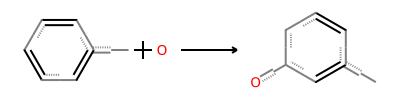

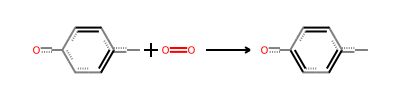

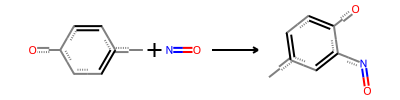

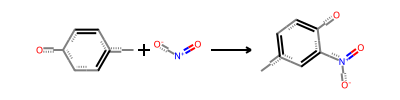

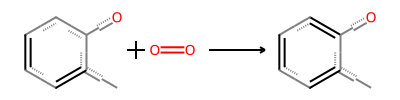

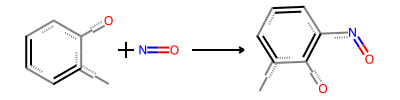

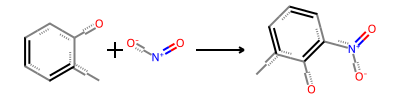

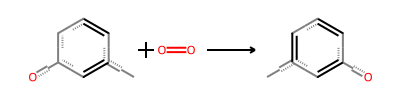

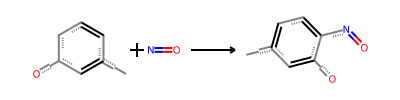

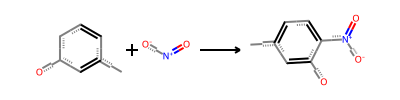

In [ ]:
# Load and preprocess data
data_file = "SOA_SMILES_K.csv"
df = load_data(data_file)
reaction_images = generate_reaction_images(df)


# Display reaction images
for img in reaction_images:
    display(img)